# Jump Search
With Jump Search, the sorted array of data is split into subsets of elements called blocks. We find the search key (input value) by comparing the search candidate in each block. As the array is sorted, the search candidate is the highest value of a block.

When comparing the search key to a search candidate, the algorithm can then do 1 of 3 things:

If the search candidate is lesser than the search key, we'll check the subsequent block

If the search candidate is greater than the search key, we'll do a linear search on the current block.

If the search candidate is the same as the search key, return the candidate

The size of the block is chosen as the square root of the array's length. Therefore, arrays with length n have a block size of √n, as this on average gives the best performance for most arrays.


It might be useful to illustrate how it works. Here's how Jump Search would fine the value 78 in an array of 9 elements:

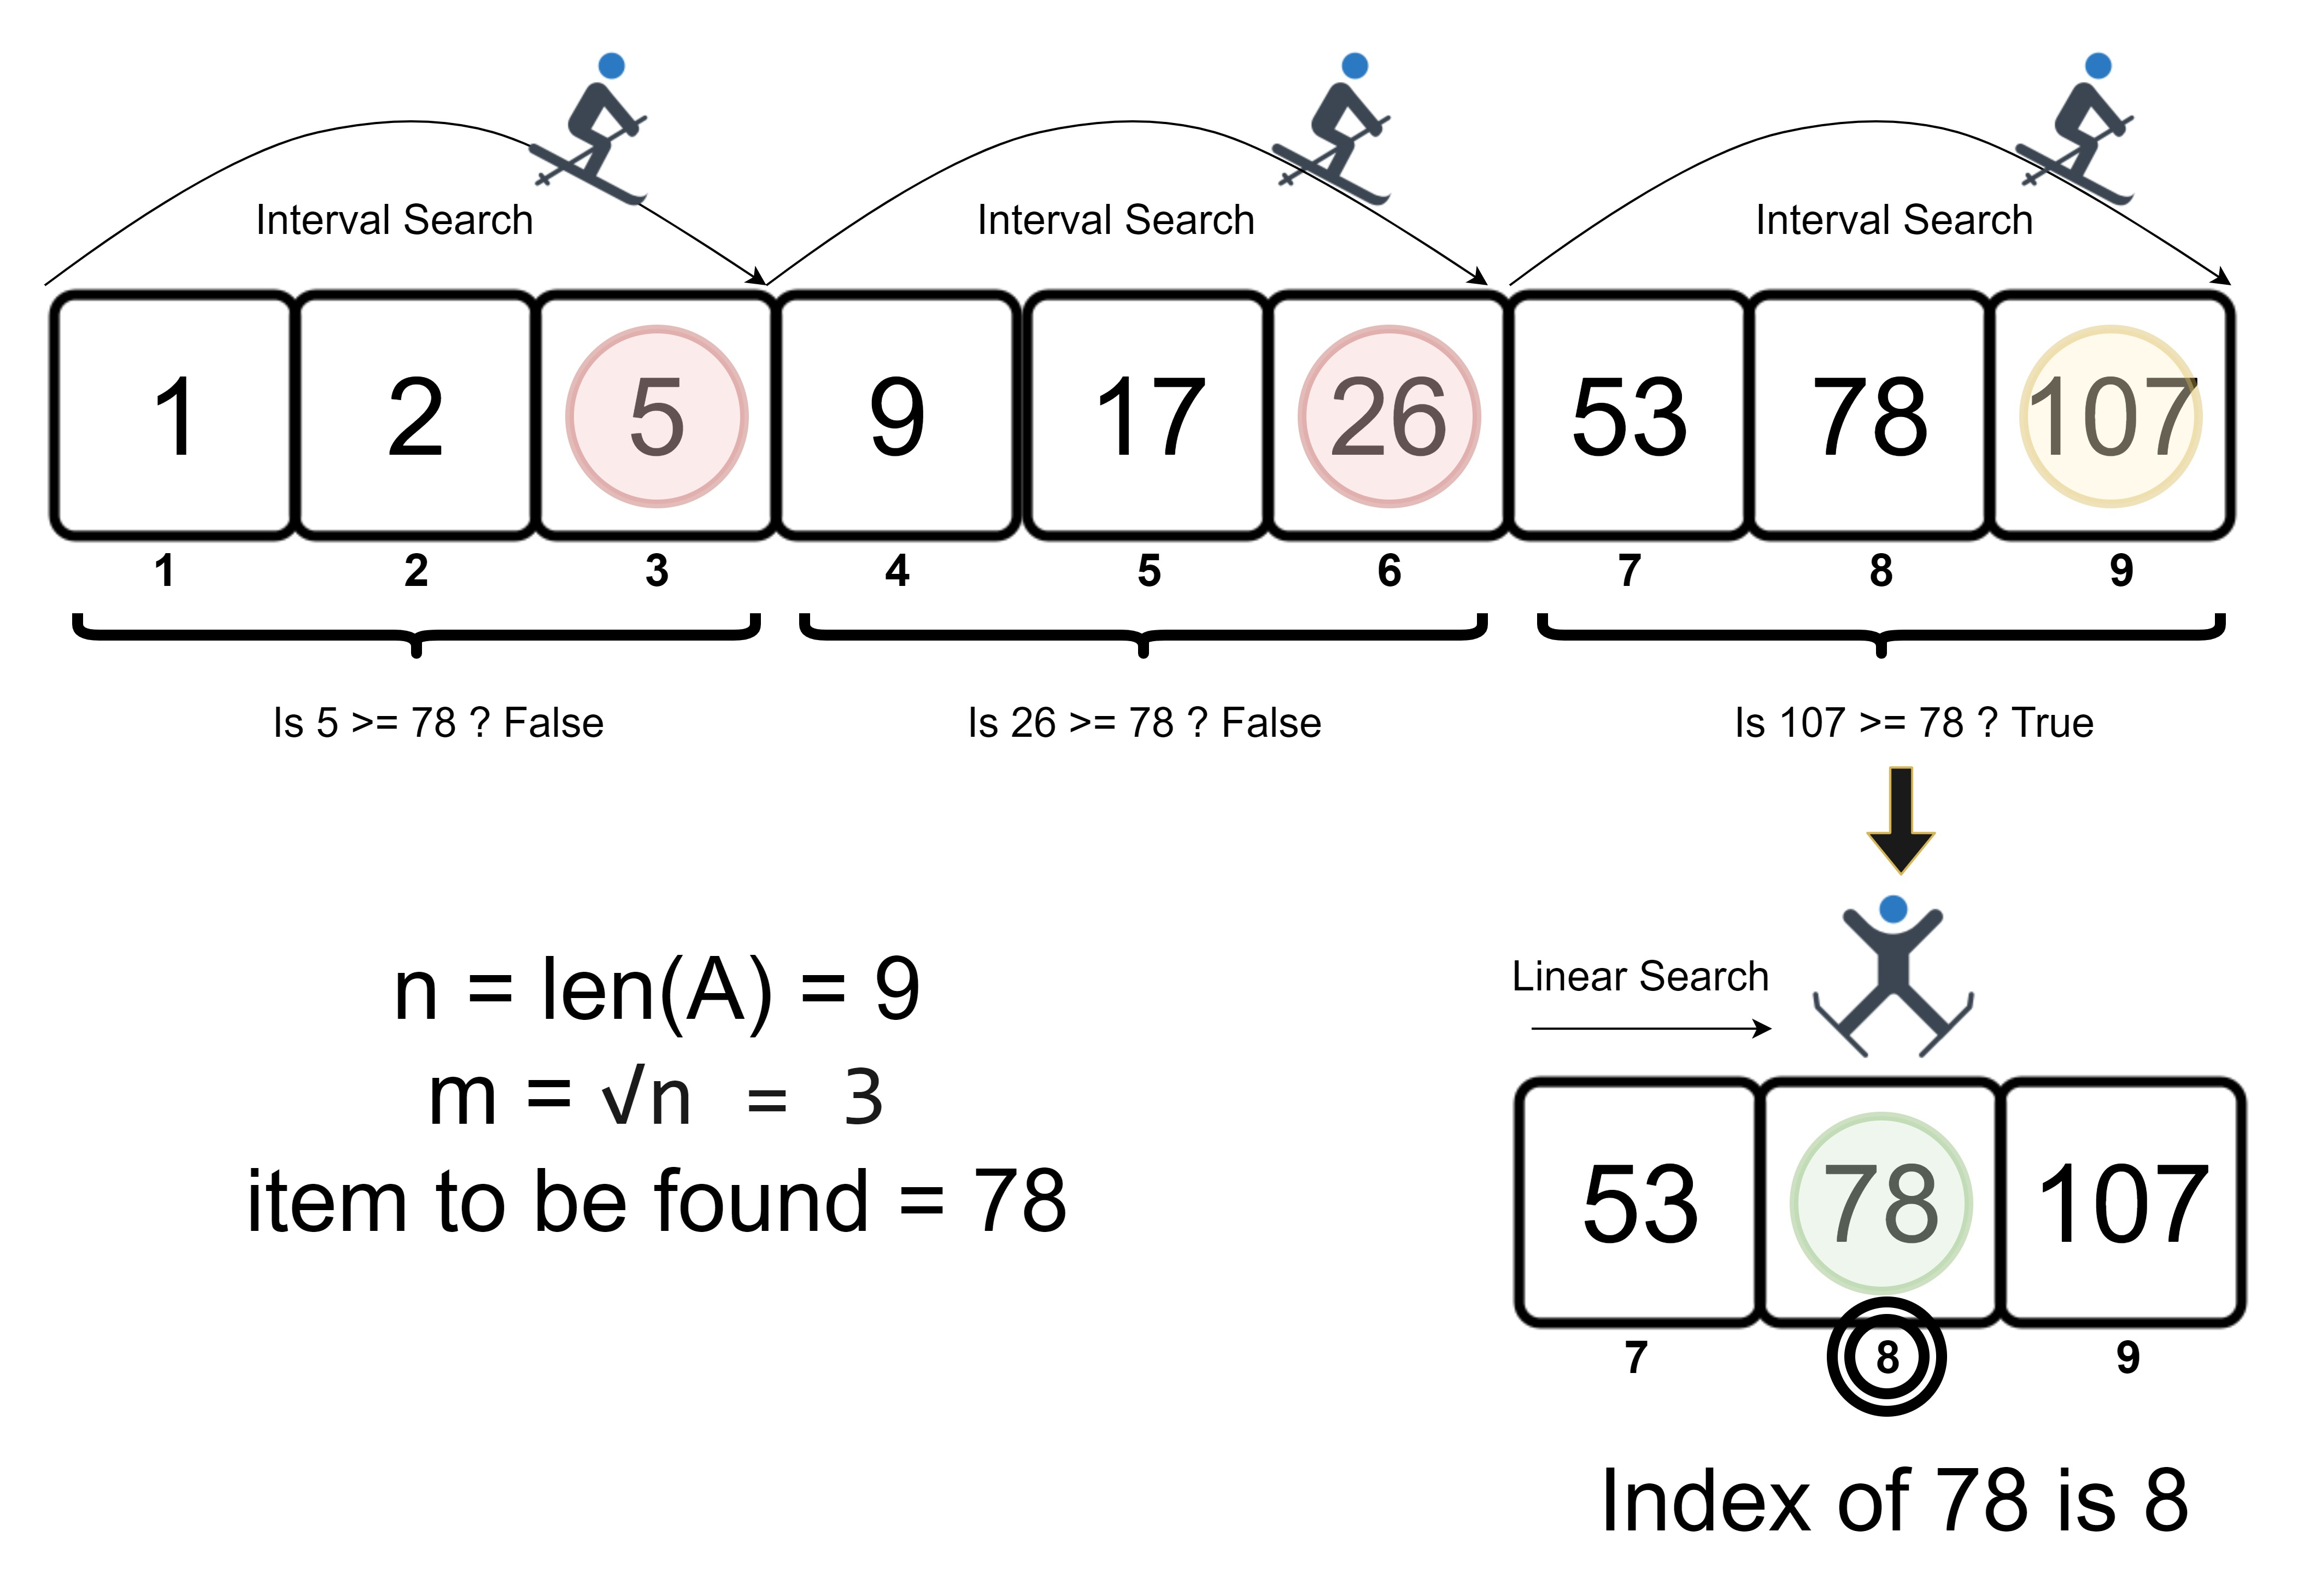

Let’s consider the following array: (0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610). Length of the array is 16. 

Jump search will find the value of 55 with the following steps assuming that the block size to be jumped is 4.

STEP 1: Jump from index 0 to index 4;

STEP 2: Jump from index 4 to index 8;

STEP 3: Jump from index 8 to index 12;

STEP 4: Since the element at index 12 is greater than 55 we will jump back a step to come to index 8.

STEP 5: Perform linear search from index 8 to get the element 55.


What is the optimal block size to be skipped?

In the worst case, we have to do n/m jumps and if the last checked value is greater than the element to be searched for, we 
perform m-1 comparisons more for linear search. Therefore the total number of comparisons in the worst case will be ((n/m) + m-
1). The value of the function ((n/m) + m-1) will be minimum when m = √n. Therefore, the best step size is m = √n.

In [4]:
# Python3 code to implement Jump Search 
import math 

def jumpSearch( arr , x , n ): 
	
	# Finding block size to be jumped 
	step = math.sqrt(n) 
	
	# Finding the block where element is 
	# present (if it is present) 
	prev = 0
	while arr[int(min(step, n)-1)] < x: 
		prev = step 
		step += math.sqrt(n) 
		if prev >= n: 
			return -1
	
	# Doing a linear search for x in 
	# block beginning with prev. 
	while arr[int(prev)] < x: 
		prev += 1
		
		# If we reached next block or end 
		# of array, element is not present. 
		if prev == min(step, n): 
			return -1
	
	# If element is found 
	if arr[int(prev)] == x: 
		return prev 
	
	return -1

# Driver code to test function 
arr = [ 0, 1, 1, 2, 3, 5, 8, 13, 21, 
	34, 55, 89, 144, 233, 377, 610 ] 
x = 55
n = len(arr) 

# Find the index of 'x' using Jump Search 
index = jumpSearch(arr, x, n) 

# Print the index where 'x' is located 
print("Number" , x, "is at index" ,"%.0f"%index) 

# This code is contributed by "Sharad_Bhardwaj". 


Number 55 is at index 10


### Important points:

Works only sorted arrays.
The optimal size of a block to be jumped is (√ n). This makes the time complexity of Jump Search O(√ n).
The time complexity of Jump Search is between Linear Search ( ( O(n) ) and Binary Search ( O (Log n) ).
Binary Search is better than Jump Search, but Jump search has an advantage that we traverse back only once (Binary Search may require up to O(Log n) jumps, consider a situation where the element to be searched is the smallest element or smaller than the smallest). So in a system where binary search is costly, we use Jump Search.